<a href="https://colab.research.google.com/github/YBilodeau/Metabolic-Syndrome-Prediction-Project/blob/main/Metabolic_Syndrome_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Metabolic Syndrome Prediction**

- Yvon Bilodeau
- March 2022



---



### **Project Description**


The goal of this project is to predict metabolic syndrome, yes or no based on common risk factors.

The dataset for this analysis came from the [NHANES](https://www.cdc.gov/nchs/nhanes/index.htm) initiative where the following variables were combined from multiple tables with SQL: abnormal waist circumference, triglycerides above 150, HDL cholesterol below 50 in women or 40 in men, history of hypertension and mildly elevated fasting blood sugar (100-125). Additionally other variables were added, such as uric acid, race, income, etc. that may contribute to the model.

### **Source of data**

- [Data World](https://data.world/informatics-edu/metabolic-syndrome-prediction)


## **Mount Data | Import Libraries | Load the Dataset**

### **Mount Google Drive**

In [1]:
# Mount Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Import Libraries**

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

### **Load the Dataset**

- Data downloaded from [link](https://data.world/informatics-edu/metabolic-syndrome-prediction/file/Metabolic%20%20Syndrome.csv).

In [3]:
# Load the dataset.
filename = "/content/drive/MyDrive/Colab Notebooks/CodingDojo/000 Data Files/Metabolic  Syndrome.csv"
df = pd.read_csv(filename)

## **Inspect the Data**

### Display the Row and Column Count

In [4]:
# Display the number of rows and columns for the dataframe.
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')
print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable.')

There are 2401 rows, and 15 columns.
The rows represent 2401 observations, and the columns represent 14 features and 1 target variable.


### Display Data Types

In [5]:
# Display the column names and datatypes for each column.
# Columns with mixed datatypes are identified as an object datatype.
df.dtypes

seqn                   int64
Age                    int64
Sex                   object
Marital               object
Income               float64
Race                  object
WaistCirc            float64
BMI                  float64
Albuminuria            int64
UrAlbCr              float64
UricAcid             float64
BloodGlucose           int64
HDL                    int64
Triglycerides          int64
MetabolicSyndrome     object
dtype: object

### Display Column Names, Count of Non-Null Values, and Data Types

In [6]:
# Display the column names, count of non-null values, and their datatypes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2401 non-null   int64  
 1   Age                2401 non-null   int64  
 2   Sex                2401 non-null   object 
 3   Marital            2193 non-null   object 
 4   Income             2284 non-null   float64
 5   Race               2401 non-null   object 
 6   WaistCirc          2316 non-null   float64
 7   BMI                2375 non-null   float64
 8   Albuminuria        2401 non-null   int64  
 9   UrAlbCr            2401 non-null   float64
 10  UricAcid           2401 non-null   float64
 11  BloodGlucose       2401 non-null   int64  
 12  HDL                2401 non-null   int64  
 13  Triglycerides      2401 non-null   int64  
 14  MetabolicSyndrome  2401 non-null   object 
dtypes: float64(5), int64(6), object(4)
memory usage: 281.5+ KB


### Display First (10) Rows

In [7]:
# Display the first (10) rows of the dataframe.
df.head(10)

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,No MetSyn
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,No MetSyn
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,No MetSyn
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,No MetSyn
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,No MetSyn
5,62178,80,Male,Widowed,300.0,White,112.5,28.5,0,9.79,4.8,105,47,100,No MetSyn
6,62184,26,Male,Single,9000.0,Black,78.6,22.1,0,9.21,5.4,87,61,40,No MetSyn
7,62189,30,Female,Married,6200.0,Asian,80.2,22.4,0,8.78,6.7,83,48,91,No MetSyn
8,62191,70,Male,Divorced,1000.0,Black,NaN,NaN,1,45.67,5.4,96,35,75,No MetSyn
9,62195,35,Male,NaN,2500.0,Black,99.0,28.2,0,2.21,6.7,94,46,86,No MetSyn


- Data appears to have loaded correctly.

## **Clean the Data**

In [8]:
# Display the descriptive statistics for the numeric columns.
df.describe()

,seqn,Age,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides
count,2401.000000,2401.000000,2284.000000,2316.000000,2375.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000
mean,67030.674302,48.691795,4005.253940,98.307254,28.702189,0.154102,43.626131,5.489046,108.247813,53.369429,128.125364
std,2823.565114,17.632852,2954.032186,16.252634,6.662242,0.422780,258.272829,1.439358,34.820657,15.185537,95.322477
min,62161.000000,20.000000,300.000000,56.200000,13.400000,0.000000,1.400000,1.800000,39.000000,14.000000,26.000000
25%,64591.000000,34.000000,1600.000000,86.675000,24.000000,0.000000,4.450000,4.500000,92.000000,43.000000,75.000000
50%,67059.000000,48.000000,2500.000000,97.000000,27.700000,0.000000,7.070000,5.400000,99.000000,51.000000,103.000000
75%,69495.000000,63.000000,6200.000000,107.625000,32.100000,0.000000,13.690000,6.400000,110.000000,62.000000,150.000000
max,71915.000000,80.000000,9000.000000,176.000000,68.700000,2.000000,5928.000000,11.300000,382.000000,156.000000,1562.000000


In [9]:
# Display the descriptive statistics for the non-numeric columns.
df.describe(exclude="number")

,Sex,Marital,Race,MetabolicSyndrome
count,2401,2193,2401,2401
unique,2,5,6,2
top,Female,Married,White,No MetSyn
freq,1211,1192,933,1579


### **Remove Unnecessary Columns**

#### **seqn column**

In [10]:
# Display the count of unique values and the cardinlity for this column.
unique_values = df.shape[0]
cardinality = (df['seqn'].value_counts().sum())/(df.shape[0])*100
print(f'This column has {unique_values} unique values which is {cardinality}% cardinality.')

This column has 2401 unique values which is 100.0% cardinality.


- This column will not contribute to predictability and so may be removed.

In [11]:
# Drop the column.
df.drop(columns = ['seqn'], inplace=True)

- Confirm column has been dropped.

In [12]:
# Display the first (5) rows of the dataframe.
df.head()

,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,No MetSyn
1,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,No MetSyn
2,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,No MetSyn
3,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,No MetSyn
4,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,No MetSyn


### **Remove Unecessary Rows**

In [13]:
# Count the number of duplicate rows.
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


- No duplicates were found or dropped.

### **Missing Values**

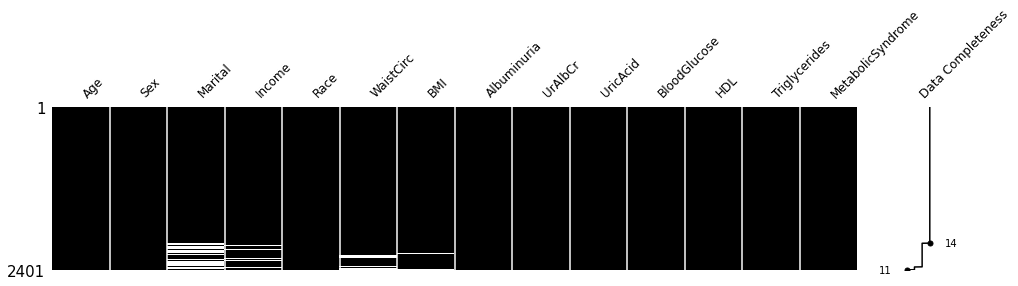

In [14]:
# Display missing values by column.
msno.matrix(df, figsize=(16,3), labels=True, fontsize=12, sort="descending", color=(0,0,0));

In [15]:
# Display the count of missing values by column.
print(df.isna().sum())

Age                    0
Sex                    0
Marital              208
Income               117
Race                   0
WaistCirc             85
BMI                   26
Albuminuria            0
UrAlbCr                0
UricAcid               0
BloodGlucose           0
HDL                    0
Triglycerides          0
MetabolicSyndrome      0
dtype: int64


- 'Marital', 'Income', 'WaistCirc' and 'BMI' columns have missing values.

#### **Statistics Function**

In [16]:
# Creates a function to display supplemental statistics
def column_statistics(column_name, max_unique_values_to_disply=20):
    # Display the count of missing values for this column.
    print(f'Missing Values: {df[column_name].isna().sum()} ({round((df[column_name].isna().sum())/(df.shape[0])*100,1)})%')

    # Determine Outliers - Only if this is a numeric column
    if (df[column_name].dtype == 'int64') | (df[column_name].dtype == 'float64'):
        # Create outlier filters
        q1 = df[column_name].quantile(0.25) # 25th percentile
        q3 = df[column_name].quantile(0.75) # 75th percentile
        iqr = q3 - q1 # Interquartile range
        low_limit = q1 - (1.5 * iqr) # low limit
        high_limit = q3 + (1.5 * iqr) # high limit
        # Create outlier dataframes
        low_df = df[(df[column_name] < low_limit)]
        high_df = df[(df[column_name] > high_limit)]
        # Calculate the outlier counts and percentages
        low_oulier_count = low_df.shape[0]
        low_outlier_percentge = round(((low_oulier_count)/(df.shape[0])*100),1)
        high_oulier_count = high_df.shape[0]
        high_outlier_percentge = round(((high_oulier_count)/(df.shape[0])*100),1)
        # Display the outlier counts.
        print(f'Outliers: {low_oulier_count} ({low_outlier_percentge})% low, {high_oulier_count} ({high_outlier_percentge})% high')
        
    # Display the count of unique values for this column.
    print(f'Unique values: {df[column_name].nunique()}')

    # Display the unique values including Nan and their counts for this column,
    # if the number of unique values is below the function parameter
    if df[column_name].nunique() < max_unique_values_to_disply:
        print(df[column_name].value_counts(dropna=False))

#### **Categorical Columns**

##### **Marital column**


In [17]:
# Display column statistics.
column_statistics('Marital', 1)

Missing Values: 208 (8.7)%
Unique values: 5


- **Missing Value Options and Considerations**
 - **Drop column**
   - con: This would result in a significant loss of data.
   - 8.7% missing values is not significant enough to justify this option.
 - **Drop rows with missing values**
   - con: This would result in a significant loss of data.
   - 8.7% missing rows is too significant to justify this option.
  - **Replace with constant value 'Unknown'**
   - pro: This will not introduce bias.
   - con: This will not factor correlations between features.  
   - con: This may not generate the highest prediction scores possible.
 - **Simple Imputation using strategy = 'most frequent' (mode)**
   - pro: This typically works well on categorical options.
   - con: This can introduce bias.
   - con: This will not factor correlations between features.   
 - **Advanced Imputation using SKLearn**
   - pro: This will factor correlations between features.
   - pro: This may have the potential to generate the highest prediction scores possible.
   - con: This can be memory or time intensive.

For the scope of this project we will utilize the Replace with constant value 'Unknown' as our initial strategy. However it is recommended  that others strategies be explored to see if prediction scores can be improved.


- Replacing missing values with the constant 'Unknown' will not cause data leakage and may be performed prior to Preprocessing.

In [18]:
# Fill NaN values with the constant value 'Unknown'.
df.Marital.fillna('Unknown',inplace=True)

In [19]:
# Display the unique values for this column.
print(df['Marital'].unique())

['Single' 'Married' 'Widowed' 'Divorced' 'Unknown' 'Separated']


- No missing values for this column is confirmed.

#### **Numeric Columns**

##### **Income column**

In [20]:
# Display column statistics.
column_statistics('Income', 1)

Missing Values: 117 (4.9)%
Outliers: 0 (0.0)% low, 0 (0.0)% high
Unique values: 14


- **Missing Value Options and Considerations**
 - **Drop column**
   - con: This would result in a significant loss of data.
   - 4.9% missing values is not significant enough to justify this option.
 - **Drop rows with missing values**
   - con: This would result in a significant loss of data.
   - 4.9% missing rows is too significant to justify this option.
 - **Simple Imputation using strategy = 'mean'**
   - pro: This typically works well small numeric datasets.
   - con: This can introduce bias and is affected by skew and outliers more than the 'median' value.
   - con: This will not factor correlations between features.   
 - **Simple Imputation using strategy = 'median'**
   - pro: This typically works well small numeric datasets.
   - pro: This is less affected by outliers than strategy = 'median'.
   - con: This will not factor correlations between features.     
 - **Advanced Imputation using SKLearn**
   - pro: This will factor correlations between features.
   - pro: This may have the potential to generate the highest prediction scores possible.
   - con: This can be memory and or time intensive..

For the scope of this project we will utilize the (Simple Imputation using strategy = 'median') method as our initial strategy. This can introduce data leakage if applied prior to the Train Test Split and so will be handled in Preprocessing after the Train Test Split.

However it is recommended  that others strategies be explored to see if prediction accuracy can be improved.

##### **WaistCirc column**

In [21]:
# Display column statistics.
column_statistics('WaistCirc')

Missing Values: 85 (3.5)%
Outliers: 0 (0.0)% low, 44 (1.8)% high
Unique values: 635


- **Missing Value Options and Considerations**
 - **Drop column**
   - con: This would result in a significant loss of data.
   - 1.8% missing values is not significant enough to justify this option.
 - **Drop rows with missing values**
   - con: This would result in a significant loss of data.
   - 1.8% missing rows is viable, but still too significant to justify this option.
 - **Simple Imputation using strategy = 'mean'**
   - pro: This typically works well small numeric datasets.
   - con: This can introduce bias and is affected by skew and outliers more than the 'median' value.
   - con: This will not factor correlations between features.   
 - **Simple Imputation using strategy = 'median'**
   - pro: This typically works well small numeric datasets.
   - pro: This is less affected by outliers than strategy = 'median'.
   - con: This will not factor correlations between features.     
 - **Advanced Imputation using SKLearn**
   - pro: This will factor correlations between features.
   - pro: This may have the potential to generate the highest prediction scores possible.
   - con: This can be memory and or time intensive.

For the scope of this project we will utilize the (Simple Imputation using strategy = 'median') method as our initial strategy. This can introduce data leakage if applied prior to the Train Test Split and so will be handled in Preprocessing after the Train Test Split.

However it is recommended  that others strategies be explored to see if prediction accuracy can be improved.

##### **BMI column**

In [22]:
# Display column statistics.
column_statistics('BMI')

Missing Values: 26 (1.1)%
Outliers: 0 (0.0)% low, 67 (2.8)% high
Unique values: 322


- **Missing Value Options and Considerations**
 - **Drop column**
   - con: This would result in a significant loss of data.
   - 2.8% missing values is not significant enough to justify this option.
 - **Drop rows with missing values**
   - con: This would result in a significant loss of data.
   - 2.8% missing rows is viable, but still too significant to justify this option.
 - **Simple Imputation using strategy = 'mean'**
   - pro: This typically works well small numeric datasets.
   - con: This can introduce bias and is affected by skew and outliers more than the 'median' value.
   - con: This will not factor correlations between features.   
 - **Simple Imputation using strategy = 'median'**
   - pro: This typically works well small numeric datasets.
   - pro: This is less affected by outliers than strategy = 'median'.
   - con: This will not factor correlations between features.     
 - **Advanced Imputation using SKLearn**
   - pro: This will factor correlations between features.
   - pro: This may have the potential to generate the highest prediction scores possible.
   - con: This can be memory and or time intensive.

For the scope of this project we will utilize the (Simple Imputation using strategy = 'median') method as our initial strategy. This can introduce data leakage if applied prior to the Train Test Split and so will be handled in Preprocessing after the Train Test Split.

However it is recommended  that others strategies be explored to see if prediction accuracy can be improved.

### **Inspect Column Datatypes for Errors**

In [23]:
 # Ensure all columns match the data types listed in the data dictionary.
df.dtypes

Age                    int64
Sex                   object
Marital               object
Income               float64
Race                  object
WaistCirc            float64
BMI                  float64
Albuminuria            int64
UrAlbCr              float64
UricAcid             float64
BloodGlucose           int64
HDL                    int64
Triglycerides          int64
MetabolicSyndrome     object
dtype: object

In [24]:
df.head()

,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,No MetSyn
1,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,No MetSyn
2,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,No MetSyn
3,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,No MetSyn
4,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,No MetSyn


- All columns match their datatypes.

### **Inspect Column Names for Errors**

Check for common syntax errors which may include extra white spaces at the beginning or end of strings or column names.

Check for typos or inconsistencies in strings that need to be fixed.(example: cat, Cat, cats)

#### **Object Datatypes**

In [25]:
# Display column names for object datatypes.
dtypes = df.dtypes
str_cols = dtypes[dtypes=='object'].index
str_cols

Index(['Sex', 'Marital', 'Race', 'MetabolicSyndrome'], dtype='object')

- No issues noted.

#### **Numerical Datatypes**

In [26]:
# Display the column names for the numeric columns.
dtypes = df.dtypes
str_cols = dtypes[(dtypes == "float64") | (dtypes == "int64")].index
str_cols

Index(['Age', 'Income', 'WaistCirc', 'BMI', 'Albuminuria', 'UrAlbCr',
       'UricAcid', 'BloodGlucose', 'HDL', 'Triglycerides'],
      dtype='object')

- No issues noted.

### **Inspect Column Values for Errors**

#### **Object Datatypes**

Check for common syntax errors which may include extra white spaces at the beginning or end of strings or column names.

Check for typos or inconsistencies in strings that need to be fixed.

In [27]:
# Display the descriptive statistics for the non-numeric columns.
df.describe(exclude="number")

,Sex,Marital,Race,MetabolicSyndrome
count,2401,2401,2401,2401
unique,2,6,6,2
top,Female,Married,White,No MetSyn
freq,1211,1192,933,1579


##### **Sex column**

In [28]:
# Display the unique values for this column.
print(df['Sex'].unique())

['Male' 'Female']


In [29]:
df['Sex'].value_counts()

Female    1211
Male      1190
Name: Sex, dtype: int64

- No issues noted.

##### **Marital column**

In [30]:
# Display the unique values for this column.
print(df['Marital'].unique())

['Single' 'Married' 'Widowed' 'Divorced' 'Unknown' 'Separated']


In [31]:
df['Marital'].value_counts()

Married      1192
Single        498
Divorced      242
Unknown       208
Widowed       166
Separated      95
Name: Marital, dtype: int64

- No issues noted.

##### **Race column**

In [32]:
# Display the unique values for this column.
print(df['Race'].unique())

['White' 'Asian' 'Black' 'MexAmerican' 'Hispanic' 'Other']


In [33]:
df['Race'].value_counts()

White          933
Black          548
Asian          349
Hispanic       257
MexAmerican    253
Other           61
Name: Race, dtype: int64

- No issues noted.

##### **MetabolicSyndrome column**

In [34]:
# Display the unique values for this column.
print(df['MetabolicSyndrome'].unique())

['No MetSyn' 'MetSyn']


In [35]:
df['MetabolicSyndrome'].value_counts()

No MetSyn    1579
MetSyn        822
Name: MetabolicSyndrome, dtype: int64

- No issues noted.

#### **Numerical Datatypes**

In [36]:
# Display the descriptive statistics for the numeric columns.
df.describe().round(2)

,Age,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides
count,2401.00,2284.00,2316.00,2375.00,2401.00,2401.00,2401.00,2401.00,2401.00,2401.00
mean,48.69,4005.25,98.31,28.70,0.15,43.63,5.49,108.25,53.37,128.13
std,17.63,2954.03,16.25,6.66,0.42,258.27,1.44,34.82,15.19,95.32
min,20.00,300.00,56.20,13.40,0.00,1.40,1.80,39.00,14.00,26.00
25%,34.00,1600.00,86.68,24.00,0.00,4.45,4.50,92.00,43.00,75.00
50%,48.00,2500.00,97.00,27.70,0.00,7.07,5.40,99.00,51.00,103.00
75%,63.00,6200.00,107.62,32.10,0.00,13.69,6.40,110.00,62.00,150.00
max,80.00,9000.00,176.00,68.70,2.00,5928.00,11.30,382.00,156.00,1562.00


- Albuminuria has 0.00 values for min, 25%, 50%, and 75%.

##### **Albuminuria Column**

In [37]:
# Display the unique values and their counts.
df['Albuminuria'].value_counts(ascending=False)

0    2089
1     254
2      58
Name: Albuminuria, dtype: int64

In [38]:
# Display the unique values and their count percentages.
df['Albuminuria'].value_counts(ascending=False, normalize = True)

0    0.870054
1    0.105789
2    0.024157
Name: Albuminuria, dtype: float64

- Albuminuria is an ordinal column with values of 0, 1, and 2.
- It has a significant percentage count of 0 values.

## **Exploratory Data Analysis**

### **Numeric Columns**

#### **Summary**

In [39]:
df.describe()

,Age,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides
count,2401.000000,2284.000000,2316.000000,2375.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000
mean,48.691795,4005.253940,98.307254,28.702189,0.154102,43.626131,5.489046,108.247813,53.369429,128.125364
std,17.632852,2954.032186,16.252634,6.662242,0.422780,258.272829,1.439358,34.820657,15.185537,95.322477
min,20.000000,300.000000,56.200000,13.400000,0.000000,1.400000,1.800000,39.000000,14.000000,26.000000
25%,34.000000,1600.000000,86.675000,24.000000,0.000000,4.450000,4.500000,92.000000,43.000000,75.000000
50%,48.000000,2500.000000,97.000000,27.700000,0.000000,7.070000,5.400000,99.000000,51.000000,103.000000
75%,63.000000,6200.000000,107.625000,32.100000,0.000000,13.690000,6.400000,110.000000,62.000000,150.000000
max,80.000000,9000.000000,176.000000,68.700000,2.000000,5928.000000,11.300000,382.000000,156.000000,1562.000000


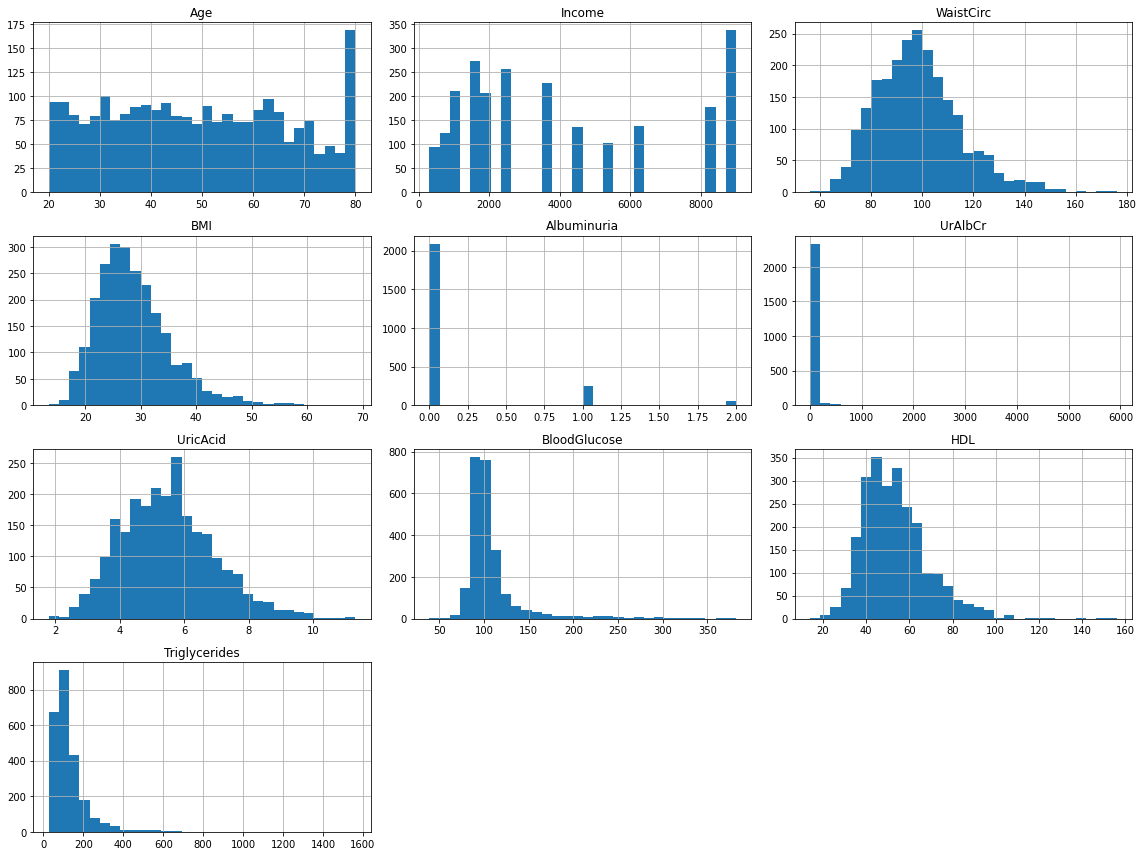

In [40]:
df.hist(figsize=(16,12), bins=30)
plt.tight_layout()
plt.show;

#### **Age**

In [41]:
# Display column statistics.
df.Age.describe()

count    2401.000000
mean       48.691795
std        17.632852
min        20.000000
25%        34.000000
50%        48.000000
75%        63.000000
max        80.000000
Name: Age, dtype: float64

In [42]:
# Display column statistics.
column_statistics('Age')

Missing Values: 0 (0.0)%
Outliers: 0 (0.0)% low, 0 (0.0)% high
Unique values: 61


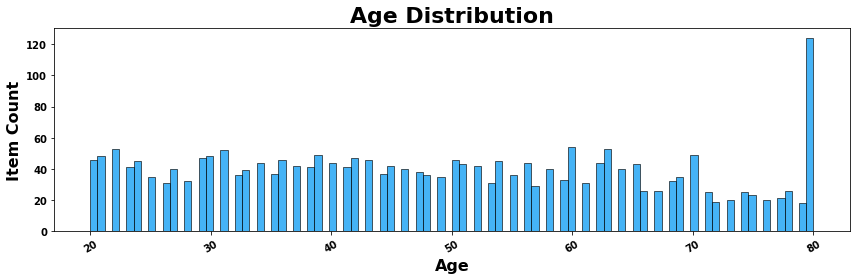

In [43]:
plt.figure(figsize = (12,4))
sns.histplot(data=df, x='Age', color='#069AF3', bins=100); 
plt.title('Age Distribution', fontsize = 22, weight='bold')
plt.xlabel('Age', fontsize = 16, weight='bold')
plt.ylabel('Item Count', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=30)
plt.yticks(fontsize = 10, weight='bold');
plt.tight_layout()
plt.show;

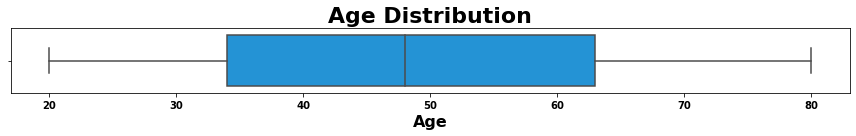

In [44]:
plt.figure(figsize = (12, 2))
sns.boxplot(data=df, x='Age', color='#069AF3'); 
plt.title('Age Distribution', fontsize = 22, weight='bold')
plt.xlabel('Age', fontsize = 16, weight='bold')
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.tight_layout()
plt.show;

- **Dispersion** - 'Age' is fairly evenly dispersed, with the excepton of the 79 year old value which is extremely high relative to other ages.
- **Skew** - 'Age' does not appear to be skewed.
- **Outliers** - 'Age' does not have any outliers.


#### **Income**

In [45]:
# Display column statistics.
df.Income.describe()

count    2284.000000
mean     4005.253940
std      2954.032186
min       300.000000
25%      1600.000000
50%      2500.000000
75%      6200.000000
max      9000.000000
Name: Income, dtype: float64

In [46]:
# Display column statistics.
column_statistics('Income')

Missing Values: 117 (4.9)%
Outliers: 0 (0.0)% low, 0 (0.0)% high
Unique values: 14
9000.0    337
2500.0    257
3500.0    228
1000.0    210
2000.0    207
1600.0    190
8200.0    178
6200.0    138
4500.0    136
800.0     123
NaN       117
5400.0    103
300.0      93
1700.0     54
1500.0     30
Name: Income, dtype: int64


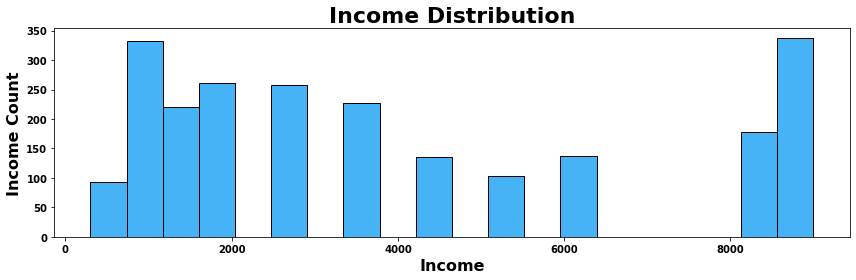

In [47]:
plt.figure(figsize = (12,4))
sns.histplot(data=df, x='Income', color='#069AF3', bins=20); 
plt.title('Income Distribution', fontsize = 22, weight='bold')
plt.xlabel('Income', fontsize = 16, weight='bold')
plt.ylabel('Income Count', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.yticks(fontsize = 10, weight='bold');
plt.tight_layout()
plt.show;

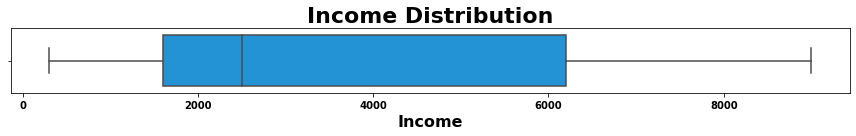

In [48]:
plt.figure(figsize = (12, 2))
sns.boxplot(data=df, x='Income', color='#069AF3'); 
plt.title('Income Distribution', fontsize = 22, weight='bold')
plt.xlabel('Income', fontsize = 16, weight='bold')
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.tight_layout()
plt.show;

- **Dispersion** - 'Income' only has 14 unique values, and is not evenly dispersed.
- **Skew** - 'Income' is postively skewed.
- **Outliers** - 'Income' does not have any outliers.

#### **WaistCirc**

In [49]:
# Display column statistics.
column_statistics('WaistCirc')

Missing Values: 85 (3.5)%
Outliers: 0 (0.0)% low, 44 (1.8)% high
Unique values: 635


In [50]:
column_statistics('WaistCirc')

Missing Values: 85 (3.5)%
Outliers: 0 (0.0)% low, 44 (1.8)% high
Unique values: 635


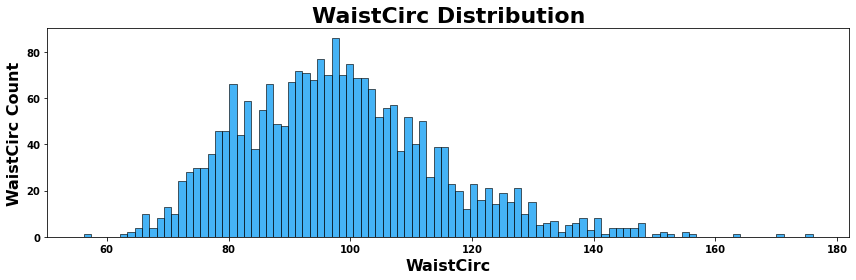

In [51]:
plt.figure(figsize = (12,4))
sns.histplot(data=df, x='WaistCirc', color='#069AF3', bins=100); 
plt.title('WaistCirc Distribution', fontsize = 22, weight='bold')
plt.xlabel('WaistCirc', fontsize = 16, weight='bold')
plt.ylabel('WaistCirc Count', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.yticks(fontsize = 10, weight='bold');
plt.tight_layout()
plt.show;

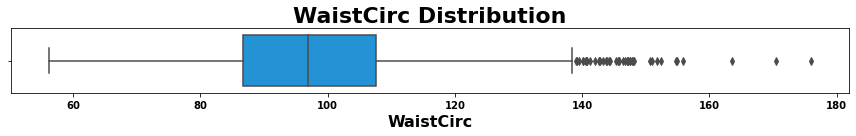

In [52]:
plt.figure(figsize = (12, 2))

sns.boxplot(data=df, x='WaistCirc', color='#069AF3'); 

plt.title('WaistCirc Distribution', fontsize = 22, weight='bold')
plt.xlabel('WaistCirc', fontsize = 16, weight='bold')
plt.xticks(fontsize = 10, weight='bold', rotation=0)

plt.tight_layout()
plt.show;

- **Dispersion** - 'WaistCirc' is fairly evenly dispersed.
- **Skew** - 'WaistCirc' does not appear to be skewed.
- **Outliers** - 'WaistCirc' has 44 (1.8%) outliers on the high side. 

#### **BMI**

In [53]:
# Display column statistics.
df.BMI.describe()

count    2375.000000
mean       28.702189
std         6.662242
min        13.400000
25%        24.000000
50%        27.700000
75%        32.100000
max        68.700000
Name: BMI, dtype: float64

In [54]:
# Display column statistics.
column_statistics('BMI')

Missing Values: 26 (1.1)%
Outliers: 0 (0.0)% low, 67 (2.8)% high
Unique values: 322


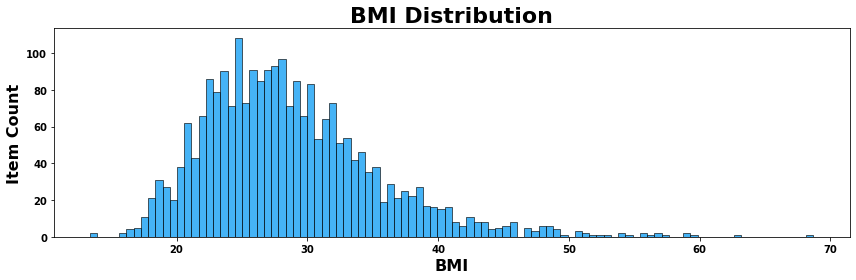

In [55]:
plt.figure(figsize = (12,4))
sns.histplot(data=df, x='BMI', color='#069AF3', bins=100); 
plt.title('BMI Distribution', fontsize = 22, weight='bold')
plt.xlabel('BMI', fontsize = 16, weight='bold')
plt.ylabel('Item Count', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.yticks(fontsize = 10, weight='bold');
plt.tight_layout()
plt.show;

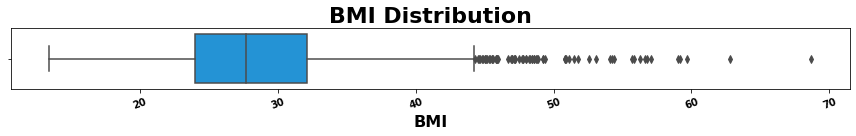

In [56]:
plt.figure(figsize = (12, 2))
sns.boxplot(data=df, x='BMI', color='#069AF3'); 
plt.title('BMI Distribution', fontsize = 22, weight='bold')
plt.xlabel('BMI', fontsize = 16, weight='bold')
plt.xticks(fontsize = 10, weight='bold', rotation=20)
plt.tight_layout()
plt.show;

- **Dispersion** - 'WaistCirc' is fairly evenly dispersed.
- **Skew** - 'WaistCirc' does not appear to be skewed.
- **Outliers** - 'WaistCirc' has 67 (2.8%) outliers on the high side. 

#### **Albuminuria**

In [57]:
# Display column statistics.
df.Albuminuria.describe()

count    2401.000000
mean        0.154102
std         0.422780
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: Albuminuria, dtype: float64

In [58]:
# Display column statistics.
column_statistics('Albuminuria')

Missing Values: 0 (0.0)%
Outliers: 0 (0.0)% low, 312 (13.0)% high
Unique values: 3
0    2089
1     254
2      58
Name: Albuminuria, dtype: int64


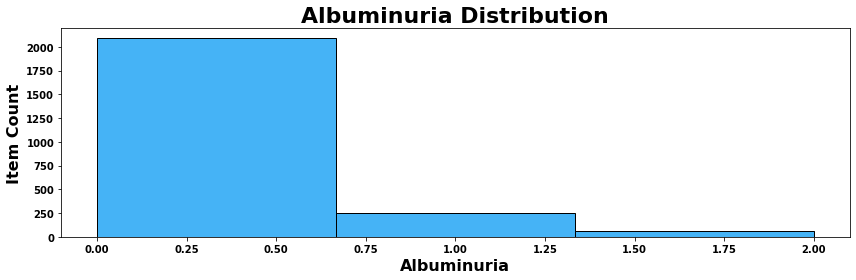

In [59]:
plt.figure(figsize = (12,4))
sns.histplot(data=df, x='Albuminuria', color='#069AF3', bins=3); 
plt.title('Albuminuria Distribution', fontsize = 22, weight='bold')
plt.xlabel('Albuminuria', fontsize = 16, weight='bold')
plt.ylabel('Item Count', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.yticks(fontsize = 10, weight='bold');
plt.tight_layout()
plt.show;

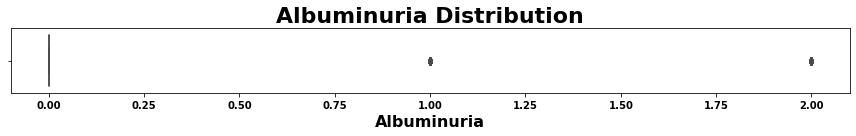

In [60]:
plt.figure(figsize = (12, 2))
sns.boxplot(data=df, x='Albuminuria', color='#069AF3'); 
plt.title('Albuminuria Distribution', fontsize = 22, weight='bold')
plt.xlabel('Albuminuria', fontsize = 16, weight='bold')
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.tight_layout()
plt.show;

- Albuminuria is an ordinal column with values of 0, 1, and 2.
- It has a significant count of '0' values relative to the '1' and '2' values.
- **Outliers** - 'WaistCirc' has 312 (13.0%) outliers on the high side, this includes all of the '1' and '2' values.

#### **UrAlbCr**

In [61]:
# Display column statistics.
df.UrAlbCr.describe()

count    2401.000000
mean       43.626131
std       258.272829
min         1.400000
25%         4.450000
50%         7.070000
75%        13.690000
max      5928.000000
Name: UrAlbCr, dtype: float64

In [62]:
# Display column statistics.
column_statistics('UrAlbCr')

Missing Values: 0 (0.0)%
Outliers: 0 (0.0)% low, 332 (13.8)% high
Unique values: 1383


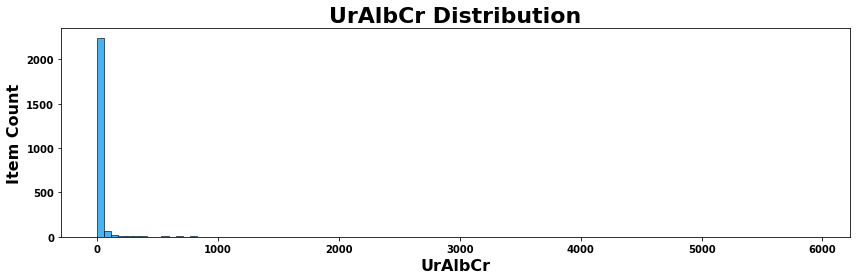

In [63]:
plt.figure(figsize = (12,4))
sns.histplot(data=df, x='UrAlbCr', color='#069AF3', bins=100); 
plt.title('UrAlbCr Distribution', fontsize = 22, weight='bold')
plt.xlabel('UrAlbCr', fontsize = 16, weight='bold')
plt.ylabel('Item Count', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.yticks(fontsize = 10, weight='bold');
plt.tight_layout()
plt.show;

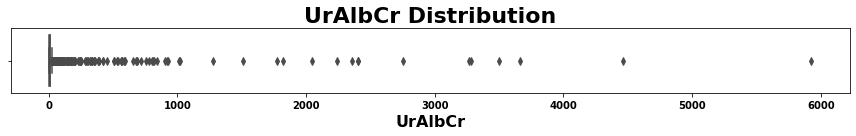

In [64]:
plt.figure(figsize = (12, 2))
sns.boxplot(data=df, x='UrAlbCr', color='#069AF3'); 
plt.title('UrAlbCr Distribution', fontsize = 22, weight='bold')
plt.xlabel('UrAlbCr', fontsize = 16, weight='bold')
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.tight_layout()
plt.show;

- **Dispersion** - 'UrAlbCr' has the majority or its values between 0 and 100.
- **Outliers** - 'UrAlbCr' has 332 (13.8%) outliers on the high side. 

#### **UricAcid**

In [65]:
# Display column statistics.
df.UricAcid.describe()

count    2401.000000
mean        5.489046
std         1.439358
min         1.800000
25%         4.500000
50%         5.400000
75%         6.400000
max        11.300000
Name: UricAcid, dtype: float64

In [66]:
# Display column statistics.
column_statistics('UricAcid')

Missing Values: 0 (0.0)%
Outliers: 0 (0.0)% low, 30 (1.2)% high
Unique values: 88


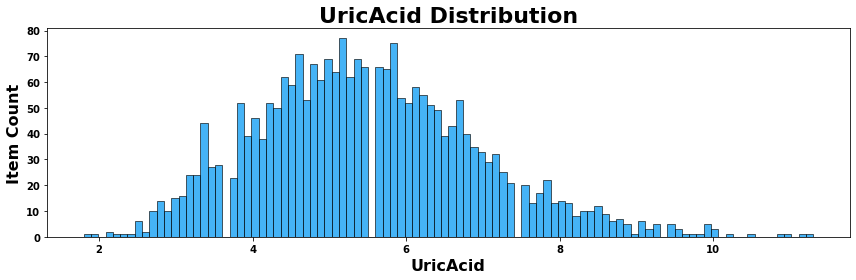

In [67]:
plt.figure(figsize = (12,4))
sns.histplot(data=df, x='UricAcid', color='#069AF3', bins=100); 
plt.title('UricAcid Distribution', fontsize = 22, weight='bold')
plt.xlabel('UricAcid', fontsize = 16, weight='bold')
plt.ylabel('Item Count', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=00)
plt.yticks(fontsize = 10, weight='bold');
plt.tight_layout()
plt.show;

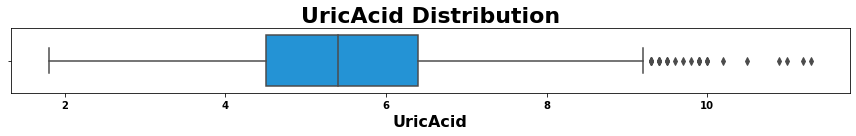

In [68]:
plt.figure(figsize = (12, 2))
sns.boxplot(data=df, x='UricAcid', color='#069AF3'); 
plt.title('UricAcid Distribution', fontsize = 22, weight='bold')
plt.xlabel('UricAcid', fontsize = 16, weight='bold')
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.tight_layout()
plt.show;

- **Dispersion** - 'UricAcid' is fairly evenly dispersed.
- **Skew** - 'UricAcid' is not skewed.
- **Outliers** - 'UricAcid' has 30 (1.2%) outliers in the high side.

#### **BloodGlucose**

In [69]:
# Display column statistics.
df.BloodGlucose.describe()

count    2401.000000
mean      108.247813
std        34.820657
min        39.000000
25%        92.000000
50%        99.000000
75%       110.000000
max       382.000000
Name: BloodGlucose, dtype: float64

In [70]:
# Display column statistics.
column_statistics('BloodGlucose')

Missing Values: 0 (0.0)%
Outliers: 6 (0.2)% low, 214 (8.9)% high
Unique values: 187


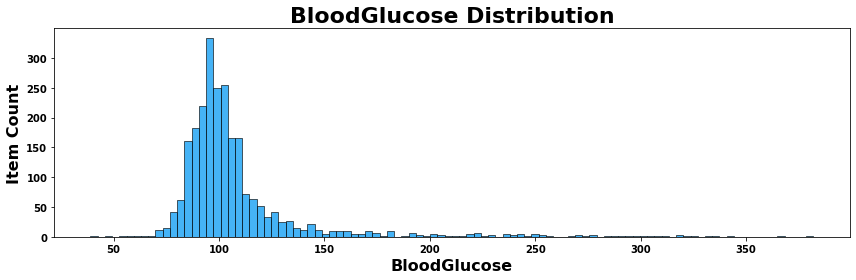

In [71]:
plt.figure(figsize = (12,4))
sns.histplot(data=df, x='BloodGlucose', color='#069AF3', bins=100); 
plt.title('BloodGlucose Distribution', fontsize = 22, weight='bold')
plt.xlabel('BloodGlucose', fontsize = 16, weight='bold')
plt.ylabel('Item Count', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.yticks(fontsize = 10, weight='bold');
plt.tight_layout()
plt.show;

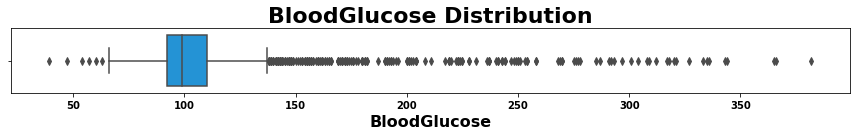

In [72]:
plt.figure(figsize = (12, 2))
sns.boxplot(data=df, x='BloodGlucose', color='#069AF3'); 
plt.title('BloodGlucose Distribution', fontsize = 22, weight='bold')
plt.xlabel('BloodGlucose', fontsize = 16, weight='bold')
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.tight_layout()
plt.show;

- **Dispersion** - 'BloodGlucose' is not evenly dispersed.
- **Skew** - 'BloodGlucose' is slightly positively skewed.
- **Outliers** - 'BloodGlucose' has 6 (0.2%) outliers on the low side, and 214 (8.9)% outliers on the high side.

#### **HDL**

In [73]:
# Display column statistics.
df.HDL.describe()

count    2401.000000
mean       53.369429
std        15.185537
min        14.000000
25%        43.000000
50%        51.000000
75%        62.000000
max       156.000000
Name: HDL, dtype: float64

In [74]:
# Display column statistics.
column_statistics('HDL')

Missing Values: 0 (0.0)%
Outliers: 1 (0.0)% low, 53 (2.2)% high
Unique values: 93


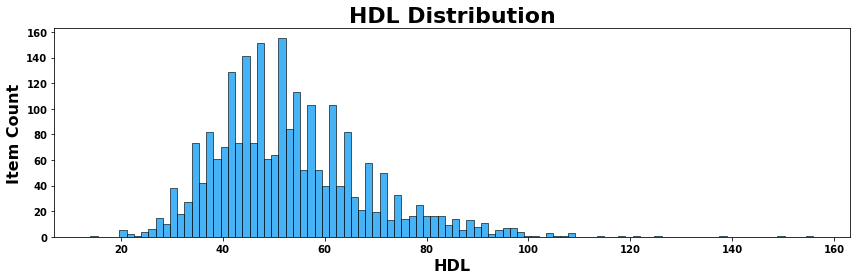

In [75]:
plt.figure(figsize = (12,4))
sns.histplot(data=df, x='HDL', color='#069AF3', bins=100); 
plt.title('HDL Distribution', fontsize = 22, weight='bold')
plt.xlabel('HDL', fontsize = 16, weight='bold')
plt.ylabel('Item Count', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.yticks(fontsize = 10, weight='bold');
plt.tight_layout()
plt.show;

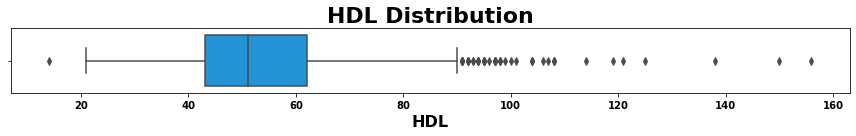

In [76]:
plt.figure(figsize = (12, 2))
sns.boxplot(data=df, x='HDL', color='#069AF3'); 
plt.title('HDL Distribution', fontsize = 22, weight='bold')
plt.xlabel('HDL', fontsize = 16, weight='bold')
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.tight_layout()
plt.show;

- **Dispersion** - 'HDL' is not evenly dispersed.
- **Skew** - 'HDL' is slightly positively skewed.
- **Outliers** - 'HDL' has only 1 (0.0%) outlier on the low side, 53 (2.2%) outliers on the high side.

#### **Triglycerides**

In [77]:
# Display column statistics.
df.Triglycerides.describe()

count    2401.000000
mean      128.125364
std        95.322477
min        26.000000
25%        75.000000
50%       103.000000
75%       150.000000
max      1562.000000
Name: Triglycerides, dtype: float64

In [78]:
# Display column statistics.
column_statistics('Triglycerides')

Missing Values: 0 (0.0)%
Outliers: 0 (0.0)% low, 161 (6.7)% high
Unique values: 345


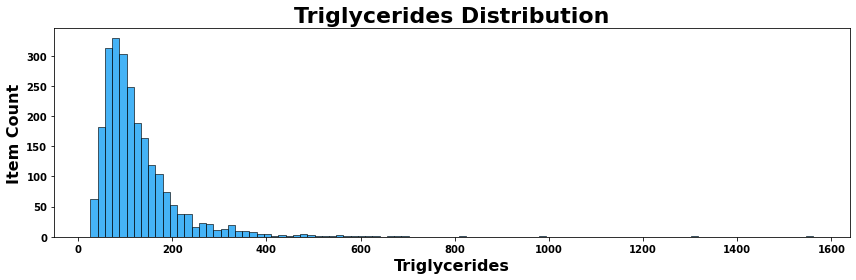

In [79]:
plt.figure(figsize = (12,4))
sns.histplot(data=df, x='Triglycerides', color='#069AF3', bins=100); 
plt.title('Triglycerides Distribution', fontsize = 22, weight='bold')
plt.xlabel('Triglycerides', fontsize = 16, weight='bold')
plt.ylabel('Item Count', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.yticks(fontsize = 10, weight='bold');
plt.tight_layout()
plt.show;

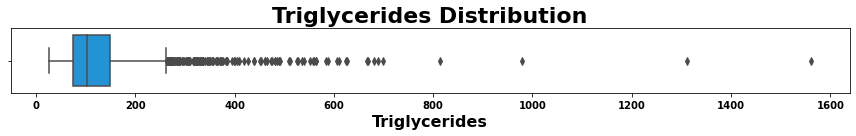

In [80]:
plt.figure(figsize = (12, 2))
sns.boxplot(data=df, x='Triglycerides', color='#069AF3'); 
plt.title('Triglycerides Distribution', fontsize = 22, weight='bold')
plt.xlabel('Triglycerides', fontsize = 16, weight='bold')
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.tight_layout()
plt.show;

- **Dispersion** - 'Triglycerides' is not evenly dispersed.
- **Skew** - 'Triglycerides' is slightly positively skewed.
- **Outliers** - 'Triglycerides' has 161 (6.7%) outliers on the high side.

### **Categorical Columns**

#### **Summary**

In [81]:
df.describe(exclude=('number'))

,Sex,Marital,Race,MetabolicSyndrome
count,2401,2401,2401,2401
unique,2,6,6,2
top,Female,Married,White,No MetSyn
freq,1211,1192,933,1579


- No issues noted.

#### **Sex**

In [82]:
# Display column statistics.
df.Sex.describe()

count       2401
unique         2
top       Female
freq        1211
Name: Sex, dtype: object

In [83]:
# Display column statistics.
column_statistics('Sex')

Missing Values: 0 (0.0)%
Unique values: 2
Female    1211
Male      1190
Name: Sex, dtype: int64


In [84]:
df['Sex'].value_counts(normalize=True)

Female    0.504373
Male      0.495627
Name: Sex, dtype: float64

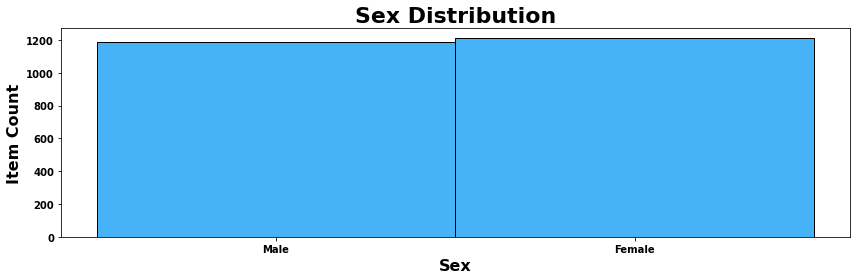

In [85]:
plt.figure(figsize = (12,4))
sns.histplot(data=df, x='Sex', color='#069AF3'); 
plt.title('Sex Distribution', fontsize = 22, weight='bold');
plt.xlabel('Sex', fontsize = 16, weight='bold');
plt.ylabel('Item Count', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=0);
plt.yticks(fontsize = 10, weight='bold');
plt.tight_layout()
plt.show;

- Sex appears to be fairly evenly balanced between the two values.

#### **Marital**

In [86]:
# Display column statistics.
df.Marital.describe()

count        2401
unique          6
top       Married
freq         1192
Name: Marital, dtype: object

In [87]:
# Display column statistics.
column_statistics('Marital')

Missing Values: 0 (0.0)%
Unique values: 6
Married      1192
Single        498
Divorced      242
Unknown       208
Widowed       166
Separated      95
Name: Marital, dtype: int64


In [88]:
df['Marital'].value_counts(normalize=True)

Married      0.496460
Single       0.207414
Divorced     0.100791
Unknown      0.086631
Widowed      0.069138
Separated    0.039567
Name: Marital, dtype: float64

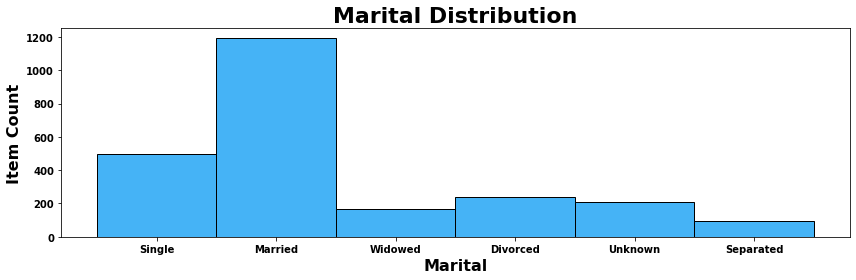

In [89]:
plt.figure(figsize = (12,4))
sns.histplot(data=df, x='Marital', color='#069AF3'); 
plt.title('Marital Distribution', fontsize = 22, weight='bold');
plt.xlabel('Marital', fontsize = 16, weight='bold');
plt.ylabel('Item Count', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=0);
plt.yticks(fontsize = 10, weight='bold');
plt.tight_layout()
plt.show;

- 'Married' has significantly more values, followed by 'Single'.

#### **MetabolicSyndrome**

In [90]:
# Display column statistics.
df.MetabolicSyndrome.describe()

count          2401
unique            2
top       No MetSyn
freq           1579
Name: MetabolicSyndrome, dtype: object

In [91]:
# Display column statistics.
column_statistics('MetabolicSyndrome')

Missing Values: 0 (0.0)%
Unique values: 2
No MetSyn    1579
MetSyn        822
Name: MetabolicSyndrome, dtype: int64


In [92]:
df['MetabolicSyndrome'].value_counts(normalize=True)

No MetSyn    0.657643
MetSyn       0.342357
Name: MetabolicSyndrome, dtype: float64

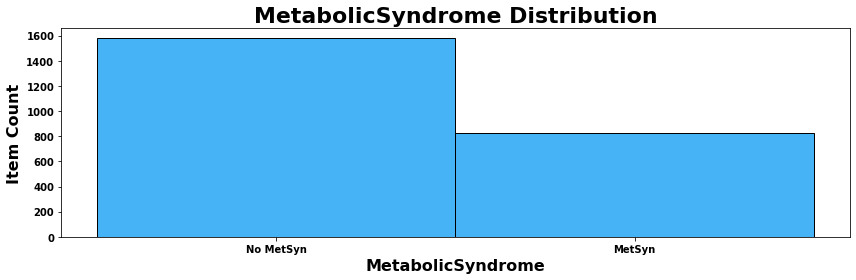

In [93]:
plt.figure(figsize = (12,4))
sns.histplot(data=df, x='MetabolicSyndrome', color='#069AF3'); 
plt.title('MetabolicSyndrome Distribution', fontsize = 22, weight='bold');
plt.xlabel('MetabolicSyndrome', fontsize = 16, weight='bold');
plt.ylabel('Item Count', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=0);
plt.yticks(fontsize = 10, weight='bold');
plt.tight_layout()
plt.show;

- There are significantly more 'No MetSyn' (negative) values than 'MetSyn' values.
- This is our target value to predict and it is unbalanced.

### **Correlation Heatmap**

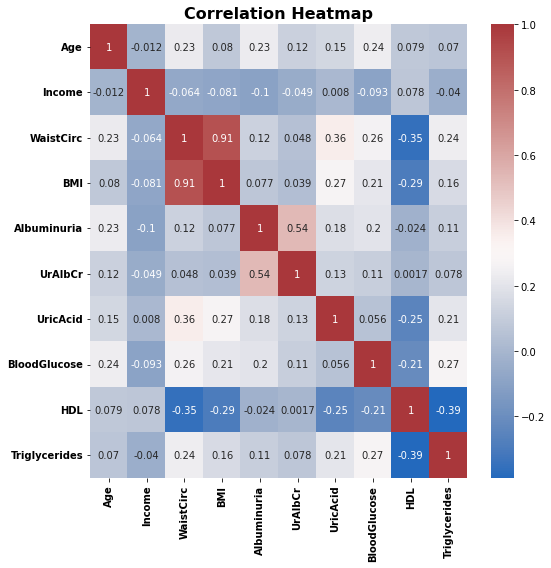

In [94]:
plt.figure(figsize = (8, 8))
corr = df.corr()
sns.heatmap(corr, cmap='vlag', annot=True);
plt.title('Correlation Heatmap', fontsize = 16, weight='bold')
plt.xticks(fontsize = 10, weight='bold', rotation=90)
plt.yticks(fontsize = 10, weight='bold');
plt.tight_layout()
plt.show;

- BMI and WaistCirc have high positive correlation. Body mass index (BMI) is a measure of body fat percentge based on height and weight that applies to adult men and women. BMI and WaistCirc are both dependent variables of height and weight.



---



## **To Do List**

- Plots
 - revise categorical plots to display values in descending order using groupby 
 - replace plot code with functions
 - convert plots to OOP
 - combine numeric hist and box plots into a single figure
 - optimize plot visualizations for presentations

revise categorical plots to display values in descending order using groupby

-  Calculate the means using a group by and sort values, largest to smallest and save as a variable
- In sns.barplot, add order=that var.index

Example:
avg_sales = df.groupby(""Item_Type"")[""Item_Outlet_Sales""].mean().sort_values(ascending=False)
axes = sns.barplot(x='Item_Outlet_Sales', y='Item_Type', data = df, order=avg_sales.index)
"